In [37]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in train_df['Name']]
train_df['Title'] = pd.Series(dataset_title)
train_df['Title'] = train_df['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')

dataset_title = [i.split(',')[1].split('.')[0].strip() for i in test_df['Name']]
test_df['Title'] = pd.Series(dataset_title)
test_df['Title'] = test_df['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')

In [4]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] +1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [7]:
train_df.isnull().sum()
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [8]:
def family(x):
    if x < 2:
        return 'Single'
    elif x == 2:
        return 'Couple'
    elif x <= 4:
        return 'InterM'
    else:
        return 'Large'

train_df['FamilySize'] = train_df['FamilySize'].apply(family)
test_df['FamilySize'] = test_df['FamilySize'].apply(family)

In [9]:
train_df.isnull().sum()
# test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
FamilySize       0
dtype: int64

In [10]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)


In [15]:
train_df['Cabin'] = train_df['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [16]:
test_df['Cabin'] = test_df['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')

In [17]:
train_df = train_df.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1)
test_passengers = test_df['PassengerId']
test_df = test_df.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1)

In [22]:
train_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,M,S,Mr,Couple
1,1,1,female,38.0,71.2833,C,C,Mrs,Couple
2,1,3,female,26.0,7.9250,M,S,Miss,Single
3,1,1,female,35.0,53.1000,C,S,Mrs,Couple
4,0,3,male,35.0,8.0500,M,S,Mr,Single
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,M,S,Rare,Single
887,1,1,female,19.0,30.0000,B,S,Miss,Single
888,0,3,female,28.0,23.4500,M,S,Miss,InterM
889,1,1,male,26.0,30.0000,C,C,Mr,Single


In [21]:
test_df

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,male,34.5,7.8292,M,Q,Mr,Single
1,3,female,47.0,7.0000,M,S,Mrs,Couple
2,2,male,62.0,9.6875,M,Q,Mr,Single
3,3,male,27.0,8.6625,M,S,Mr,Single
4,3,female,22.0,12.2875,M,S,Mrs,InterM
...,...,...,...,...,...,...,...,...
413,3,male,27.0,8.0500,M,S,Mr,Single
414,1,female,39.0,108.9000,C,C,Rare,Single
415,3,male,38.5,7.2500,M,S,Mr,Single
416,3,male,27.0,8.0500,M,S,Mr,Single


In [23]:
x_train = train_df.iloc[:,1:9].values
y = train_df.iloc[:,0].values
x_test = test_df.values

In [47]:
x_test.shape

(418, 27)

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
x_train[:, 1] = labelencoder_X_1.fit_transform(x_train[:, 1])
x_train[:, 4] = labelencoder_X_1.fit_transform(x_train[:, 4])
x_train[:, 5] = labelencoder_X_1.fit_transform(x_train[:, 5])
x_train[:, 6] = labelencoder_X_1.fit_transform(x_train[:, 6])
x_train[:, 7] = labelencoder_X_1.fit_transform(x_train[:, 7])

labelencoder_X_2 = LabelEncoder()
x_test[:, 1] = labelencoder_X_2.fit_transform(x_test[:, 1])
x_test[:, 4] = labelencoder_X_2.fit_transform(x_test[:, 4])
x_test[:, 5] = labelencoder_X_2.fit_transform(x_test[:, 5])
x_test[:, 6] = labelencoder_X_2.fit_transform(x_test[:, 6])
x_test[:, 7] = labelencoder_X_2.fit_transform(x_test[:, 7])

In [34]:
one_hot_encoder = OneHotEncoder(categorical_features = [0, 1, 4, 5, 6, 7])
x_train = one_hot_encoder.fit_transform(x_train).toarray()
x_test = one_hot_encoder.fit_transform(x_test).toarray()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of in

In [44]:
x_test

array([[ 0.    ,  0.    ,  1.    , ...,  1.    , 34.5   ,  7.8292],
       [ 0.    ,  0.    ,  1.    , ...,  0.    , 47.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  1.    , 62.    ,  9.6875],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  1.    , 38.5   ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    , 27.    ,  8.05  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    , 27.    , 22.3583]])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.1)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [40]:
X_train.shape

torch.Size([801, 28])

In [28]:


class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28,150)
        self.fc2 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        
        return x

In [29]:
model = Model()

In [60]:
X_train.shape

torch.Size([801, 28])

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [31]:
epochs=200
losses=[]
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 0.68141651
epoch: 11  loss: 0.61456370
epoch: 21  loss: 0.59800690
epoch: 31  loss: 0.56702250
epoch: 41  loss: 0.53824764
epoch: 51  loss: 0.51300985
epoch: 61  loss: 0.47914898
epoch: 71  loss: 0.46651784
epoch: 81  loss: 0.45864585
epoch: 91  loss: 0.46234444
epoch: 101  loss: 0.46611372
epoch: 111  loss: 0.45599771
epoch: 121  loss: 0.45205539
epoch: 131  loss: 0.45257911
epoch: 141  loss: 0.45317692
epoch: 151  loss: 0.44623879
epoch: 161  loss: 0.44590151
epoch: 171  loss: 0.44789582
epoch: 181  loss: 0.44352797
epoch: 191  loss: 0.44431704


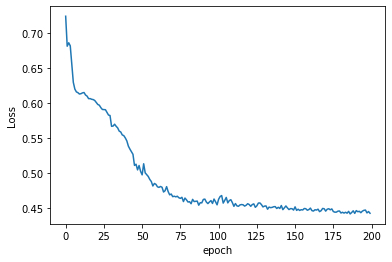

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [38]:
correct = 0
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val.argmax().item()):38}  {y_test[i]}')
        predictions.append([test_passengers[i],y_val.argmax().item()])
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. 0                                       0
 2. 1                                       1
 3. 0                                       1
 4. 0                                       0
 5. 1                                       0
 6. 1                                       1
 7. 0                                       1
 8. 0                                       0
 9. 0                                       1
10. 0                                       0
11. 0                                       0
12. 1                                       1
13. 0                                       0
14. 1                                       1
15. 0                                       0
16. 1                                       1
17. 1                                       0
18. 0                                       0
19. 0                                       0
20. 0                                       0
21. 0                                       1
22. 1                             

/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [39]:
predictions

[[892, 0],
 [893, 1],
 [894, 0],
 [895, 0],
 [896, 1],
 [897, 1],
 [898, 0],
 [899, 0],
 [900, 0],
 [901, 0],
 [902, 0],
 [903, 1],
 [904, 0],
 [905, 1],
 [906, 0],
 [907, 1],
 [908, 1],
 [909, 0],
 [910, 0],
 [911, 0],
 [912, 0],
 [913, 1],
 [914, 0],
 [915, 1],
 [916, 0],
 [917, 1],
 [918, 0],
 [919, 0],
 [920, 0],
 [921, 1],
 [922, 0],
 [923, 1],
 [924, 0],
 [925, 0],
 [926, 0],
 [927, 1],
 [928, 1],
 [929, 1],
 [930, 0],
 [931, 0],
 [932, 0],
 [933, 0],
 [934, 1],
 [935, 0],
 [936, 1],
 [937, 0],
 [938, 0],
 [939, 0],
 [940, 1],
 [941, 1],
 [942, 1],
 [943, 0],
 [944, 1],
 [945, 1],
 [946, 0],
 [947, 0],
 [948, 0],
 [949, 1],
 [950, 0],
 [951, 0],
 [952, 1],
 [953, 0],
 [954, 1],
 [955, 0],
 [956, 0],
 [957, 0],
 [958, 0],
 [959, 0],
 [960, 0],
 [961, 0],
 [962, 0],
 [963, 0],
 [964, 0],
 [965, 0],
 [966, 0],
 [967, 0],
 [968, 0],
 [969, 0],
 [970, 1],
 [971, 0],
 [972, 0],
 [973, 1],
 [974, 0],
 [975, 0],
 [976, 0],
 [977, 1],
 [978, 0],
 [979, 0],
 [980, 0],
 [981, 0]]

In [40]:
import csv

submission = [['PassengerId', 'Survived']]
for i in range(len(predictions)):
    submission.append(predictions[i])

In [41]:
with open('submission.csv', 'w') as submissionFile:
    writer = csv.writer(submissionFile)
    writer.writerows(submission)
    
print('Writing Complete!')

Writing Complete!


In [42]:
test = pd.read_csv('submission.csv')
test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
85,977,1
86,978,0
87,979,0
88,980,0


In [43]:
train_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,M,S,Mr,Couple
1,1,1,female,38.0,71.2833,C,C,Mrs,Couple
2,1,3,female,26.0,7.9250,M,S,Miss,Single
3,1,1,female,35.0,53.1000,C,S,Mrs,Couple
4,0,3,male,35.0,8.0500,M,S,Mr,Single
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,M,S,Rare,Single
887,1,1,female,19.0,30.0000,B,S,Miss,Single
888,0,3,female,28.0,23.4500,M,S,Miss,InterM
889,1,1,male,26.0,30.0000,C,C,Mr,Single


In [44]:
test_df

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,male,34.5,7.8292,M,Q,Mr,Single
1,3,female,47.0,7.0000,M,S,Mrs,Couple
2,2,male,62.0,9.6875,M,Q,Mr,Single
3,3,male,27.0,8.6625,M,S,Mr,Single
4,3,female,22.0,12.2875,M,S,Mrs,InterM
...,...,...,...,...,...,...,...,...
413,3,male,27.0,8.0500,M,S,Mr,Single
414,1,female,39.0,108.9000,C,C,Rare,Single
415,3,male,38.5,7.2500,M,S,Mr,Single
416,3,male,27.0,8.0500,M,S,Mr,Single


In [45]:
test_passengers

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [48]:
test_df = pd.read_csv('test.csv')

In [52]:
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in test_df['Name']]
test_df['Title'] = pd.Series(dataset_title)
test_df['Title'] = test_df['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['FamilySize'] = test_df['FamilySize'].apply(family)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)
test_df['Cabin'] = test_df['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
test_df = test_df.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1)

In [54]:
x_test = test_df.values
labelencoder_X_2 = LabelEncoder()
x_test[:, 1] = labelencoder_X_2.fit_transform(x_test[:, 1])
x_test[:, 4] = labelencoder_X_2.fit_transform(x_test[:, 4])
x_test[:, 5] = labelencoder_X_2.fit_transform(x_test[:, 5])
x_test[:, 6] = labelencoder_X_2.fit_transform(x_test[:, 6])
x_test[:, 7] = labelencoder_X_2.fit_transform(x_test[:, 7])
x_test = one_hot_encoder.fit_transform(x_test).toarray()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [58]:
x_test = torch.FloatTensor(x_test)
x_test.shape

torch.Size([418, 27])

In [57]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val.argmax().item()):38}')
        predictions.append([test_passengers[i],y_val.argmax().item()])
        

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x27 and 28x150)